<a href="https://colab.research.google.com/github/Josephnyingi/Hypothesis_testing_Autolib_Electric_sharing/blob/main/Hypothesis_testing_Autolib_Electric_sharing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Specifying the Research Question

This project aims to demonstrate the concept of hypothesis testing by investigating a claim about blue-cars using a dataset from an electric car-sharing service company called Autolib.

I will be comparing the blue car usage rates in Paris and Val-de-Marne, which are two French cities. Below are the specific hypotheses of interest in this analysis:

Null Hypothesis: For both Paris and Val-de-Marne  the average number of blue-cars picked up during weekends is the same.
Ho : μ1 = μ2

Alternate Hypothesis: The average number of blue cars picked up during the weekend is different for Paris and Val-de-Marne .
Ha: μ1 ≠ μ2


# Understanding the Research Context

Carsharing or car sharing is a car rental model where people rent cars for short periods, often by the hour. It differs from traditional car rental in that the car owners are usually private individuals themselves, and the carsharing facilitator is generally distinct from the car owner. Carsharing is part of the larger trend of shared mobility.

As car-sharing continues to influence how we get from point A to B in our communities, electric car-sharing could help accelerate our transition to cleaner vehicles as they work to meet their climate goals and reduce their carbon footprint.


Autolib was an electric car-sharing service company in France that was operational between 2011 and 2018. The company had three types of electric cars, i.e., blue cars, Utilib cars, and Utilib 1.4 cars. Blue cars were the most popularly used. 

These cars were available across various postal codes and cities in France, and renters could pick up cars in one station then drop them off at a different station that was closer to their destination. 

# Experimental Design

Below are the steps that will be conducted in this analysis to fulfill the project goal satisfactorily:

•	Load data and preliminary preview characteristics of the dataset

•	Data cleaning (check for and deal with outliers, anomalies, and missing data)

•	Perform univariate and bivariate analysis

•	Specify the null and alternate hypotheses

•	Specify the sampling technique

•	Perform hypothesis testing

•	Discuss the hypothesis test results

•	Provide a project summary and conclusion


# Data relevance

The dataset used in the analysis contains records of electric car usage in France from January 2018 to June 2018. 

This dataset was originally sourced from opendataparis.com. Some of the dataset information includes postal code, day of the week, and total cars returned or picked up for blue cars, Utilib cars, and Utilib 1.4 cars. 

The data available for this analysis is valid and useful towards achieving the project goal, given the availability of both numeric and categorical attributes.



# Reading dataset

In [45]:
# Importing relevant python libraries
#
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
# Loading data from the source (csv file)

 # Dataset Url:  [http://bit.ly/DSCoreAutolibDataset]

Autolib = pd.read_csv('/content/autolib_daily_events_postal_code.csv')
Autolib

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


## Checking data

In [47]:
#Dataset Preview top
#
Autolib.head(10)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
5,75001,1/6/2018,1437,5,weekend,187,185,6,6,7,8,38,35
6,75001,1/7/2018,1440,6,weekend,180,180,2,2,10,9,34,34
7,75001,1/8/2018,1438,0,weekday,84,83,3,3,10,10,14,15
8,75001,1/9/2018,1439,1,weekday,81,84,1,1,4,4,15,15
9,75001,1/10/2018,1440,2,weekday,88,85,5,5,11,11,23,22


In [48]:
#Previewing bottom of the dataset
#
Autolib.tail(10)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16075,95880,6/10/2018,1440,6,weekend,34,32,0,0,1,0,0,0
16076,95880,6/11/2018,1440,0,weekday,17,18,0,0,0,0,0,0
16077,95880,6/12/2018,1439,1,weekday,25,25,0,0,0,0,0,0
16078,95880,6/13/2018,1440,2,weekday,12,13,0,0,1,1,0,0
16079,95880,6/14/2018,1439,3,weekday,15,13,0,0,0,0,0,0
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [49]:
#Size of the Dataset
#
Autolib.shape

(16085, 13)

In [50]:
#Statistical Description of the Dataset
#
Autolib.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [51]:
#Datatypes in the Dataset
#
Autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [52]:
# Checking whether each column has an appropriate datatype
#
Autolib.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [53]:
#Checking Column Names
#
Autolib.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [54]:
#Number of Unique Values in Columns
#
Autolib.nunique()

Postal code               104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64

## Data cleaning

In [55]:
#Checking Null Values in the Dataset
#
Autolib.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [56]:
#Checking for Duplicates in the Dataset
Autolib.duplicated().sum()

0

In [57]:
# Since we are most interested in learning more about blue cars only
# we drop all other unnecessary columns

Autolib = Autolib.drop(Autolib.columns[7:], axis=1)
Autolib.head(10)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
0,75001,1/1/2018,1440,0,weekday,110,103
1,75001,1/2/2018,1438,1,weekday,98,94
2,75001,1/3/2018,1439,2,weekday,138,139
3,75001,1/4/2018,1320,3,weekday,104,104
4,75001,1/5/2018,1440,4,weekday,114,117
5,75001,1/6/2018,1437,5,weekend,187,185
6,75001,1/7/2018,1440,6,weekend,180,180
7,75001,1/8/2018,1438,0,weekday,84,83
8,75001,1/9/2018,1439,1,weekday,81,84
9,75001,1/10/2018,1440,2,weekday,88,85


In [58]:
# Renaming columns for uniformity purpose
#

Autolib.columns = ['postal_code', 'date', 'daily_data_points', 'day_of_week', 'day_type', 'total_bluecars_taken', 
                'total_bluecars_returned']
Autolib.head(1)

,postal_code,date,daily_data_points,day_of_week,day_type,total_bluecars_taken,total_bluecars_returned
0,75001,1/1/2018,1440,0,weekday,110,103


In [59]:

# Change Date column to datetime type.
# Thats how its commonly referred in France.
#
Autolib['date'] = pd.to_datetime(Autolib['date'], format='%m/%d/%Y')

In [60]:
# Creating a new 'month' attribute

Autolib['month'] = Autolib['date'].dt.month

In [61]:
# Replacing day_of week code with actual names of week
#

encode = {"day_of_week" : {0:"monday", 1:"tuesday", 2:"wednesday", 3:"thursday",
                           4:"friday", 5:"saturday", 6:"sunday"}, "month" : {1:"January",
                          2:"February", 3:"March", 4:"April", 5:"May", 6:"June"}}

In [62]:
Autolib.replace(encode, inplace = True)
Autolib.head()

,postal_code,date,daily_data_points,day_of_week,day_type,total_bluecars_taken,total_bluecars_returned,month
0,75001,2018-01-01,1440,monday,weekday,110,103,January
1,75001,2018-01-02,1438,tuesday,weekday,98,94,January
2,75001,2018-01-03,1439,wednesday,weekday,138,139,January
3,75001,2018-01-04,1320,thursday,weekday,104,104,January
4,75001,2018-01-05,1440,friday,weekday,114,117,January


In [63]:
#Checking Column Names
#
Autolib.columns

Index(['postal_code', 'date', 'daily_data_points', 'day_of_week', 'day_type',
       'total_bluecars_taken', 'total_bluecars_returned', 'month'],
      dtype='object')

## Outliers

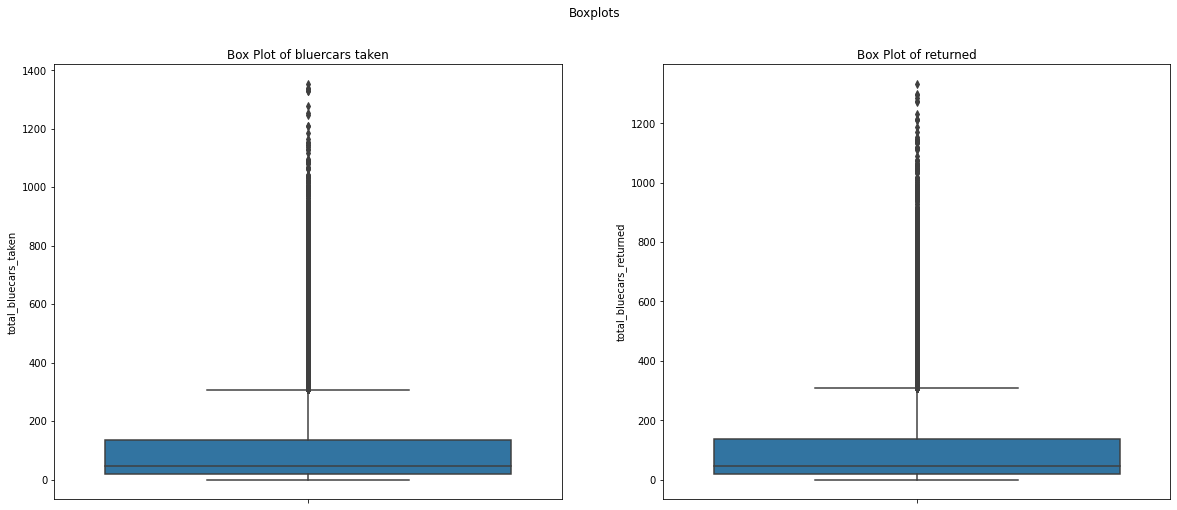

In [64]:

#Checking for the outliers by use of Box plots
#
fig, ax = plt.subplots(1,2, figsize=(20,8))
fig.suptitle('Boxplots')
sns.boxplot(data=Autolib, y = "total_bluecars_taken", ax=ax[0])
ax[0].set_title('Box Plot of bluercars taken')
sns.boxplot(data=Autolib, y = "total_bluecars_returned", ax=ax[1])
ax[1].set_title('Box Plot of returned')
plt.show()

#There are several 'outliers' in the dataset for the number of blue cars taken and returned. However, there is no sufficient evidence that point to the likelihhod of these outliers being erroneous records. Since the outliers could be valid observations, we will not delete them.

There are several 'outliers' in the dataset for the number of blue cars taken and returned. However, there is no enough evidence evidence that point to the likelihhod of these outliers being erroneous records. Since the outliers could be valid observations, we will not remove them.

## Anomalies

In [65]:
# Checking for Anomalies
# from the 'blue cars taken' variable

q1_taken = Autolib['total_bluecars_taken'].quantile(.25)
q3_taken = Autolib['total_bluecars_taken'].quantile(.75)

iqr_taken = q3_taken - q1_taken

# from the 'blue cars returned' variable
q1_returned = Autolib['total_bluecars_returned'].quantile(.25)
q3_returned = Autolib['total_bluecars_returned'].quantile(.75)

iqr_returned = q3_returned - q1_returned

# 'available data points' variable
q1_points = Autolib['daily_data_points'].quantile(.25)
q3_points = Autolib['daily_data_points'].quantile(.75)

iqr_points = q3_points - q1_points

print(iqr_taken, iqr_returned, iqr_points)

115.0 115.0 1.0


From the results the both blue cars taken and blue cars returned attributes they have 115 records that are not within the quartile 50% of the records in those columns.



## Missing values

In [66]:
# Confirming that our data has no nulls values

Autolib.isnull().sum()

postal_code                0
date                       0
daily_data_points          0
day_of_week                0
day_type                   0
total_bluecars_taken       0
total_bluecars_returned    0
month                      0
dtype: int64

# EXPLORATORY DATA ANALYSIS

## UNAVARIATE ANALYSIS

In [67]:
# Ploting the univariate summaries and recording our observations
# Creating Frequency table of country column using the value_counts() function
#
Autolib.postal_code.value_counts()

94130    156
92310    156
78140    156
94700    156
95100    156
        ... 
93150    151
93370    149
92340    147
93200    126
93390     84
Name: postal_code, Length: 104, dtype: int64

In [68]:
# lets see how each day of the week would appear?
#
Autolib.day_of_week.value_counts()

monday       2374
tuesday      2363
sunday       2274
friday       2271
wednesday    2268
thursday     2268
saturday     2267
Name: day_of_week, dtype: int64

In [69]:
# How often does each day type appear?

Autolib.day_type.value_counts()

weekday    11544
weekend     4541
Name: day_type, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


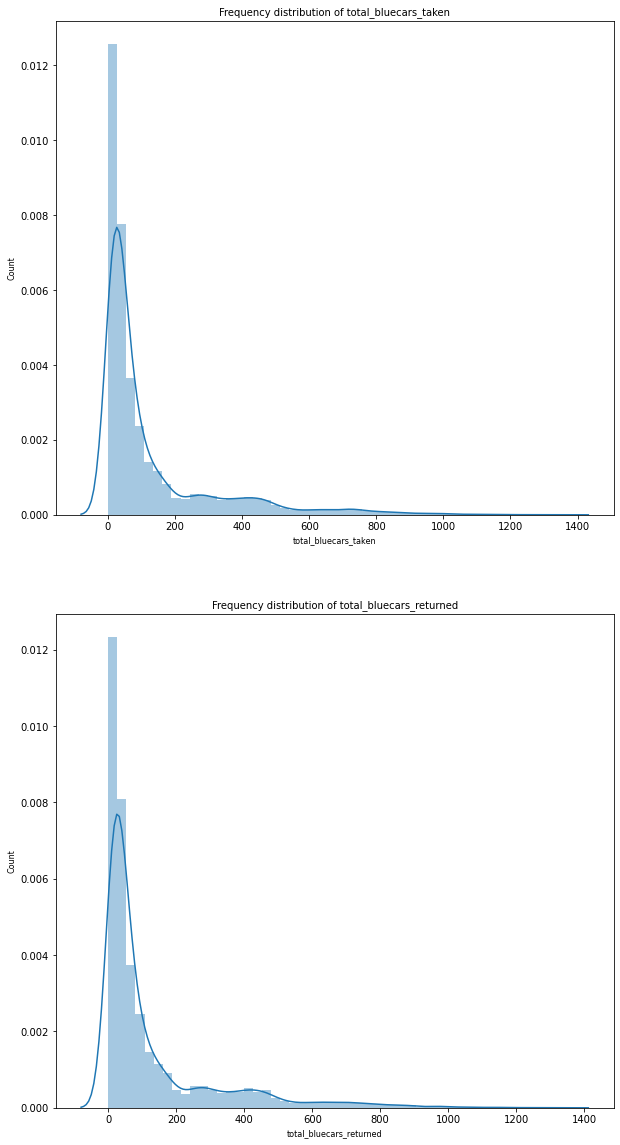

In [70]:
# Frequency distribution plots

col_names = ['total_bluecars_taken','total_bluecars_returned']
fig, ax = plt.subplots(len(col_names), figsize=(10,20))

for i, col_val in enumerate(col_names):

    sns.distplot(Autolib[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Frequency distribution of '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

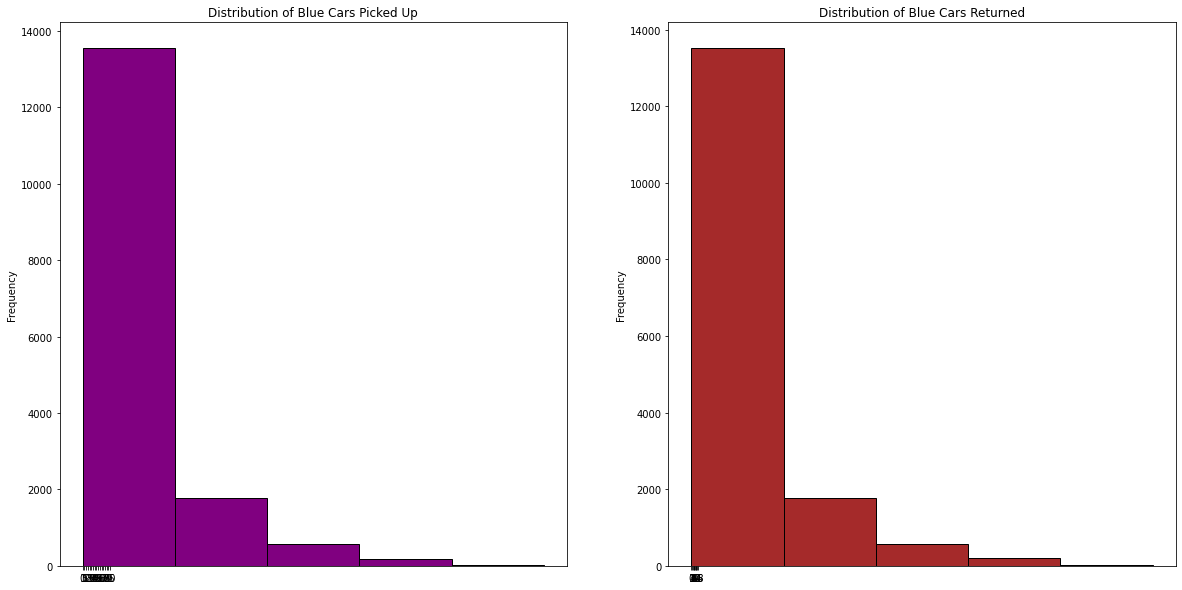

In [71]:
# plotting histograms to show the distribution of blue cars taken and returned.
#
fig,ax=plt.subplots(1,2,figsize=(20,10))
Autolib['total_bluecars_taken'].plot.hist(ax=ax[0],bins=5,edgecolor='black',color='purple')
ax[0].set_title('Distribution of Blue Cars Picked Up')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
Autolib['total_bluecars_returned'].plot.hist(ax=ax[1],color='brown',bins=5,edgecolor='black')
ax[1].set_title('Distribution of Blue Cars Returned')
x2=list(range(0,20,2))
ax[1].set_xticks(x2)
plt.show()

The two attributes are skewed to the right, meaning they dont follow the normal distribution.

## Measures of Central Tendency

In [72]:
# checking the mean, mode and median of blue cars taken in the dataset
#
mean_taken = Autolib['total_bluecars_taken'].mean()
median_taken = Autolib['total_bluecars_taken'].median()
mode_taken = Autolib['total_bluecars_taken'].mode()

print(mean_taken, median_taken, mode_taken)

125.92695057506994 46.0 0    12
dtype: int64


The mean, median and mode for cars taken are 125.93, 46.00 and 12 respectively. 

In [73]:
# We can check the mean, mode and median of blue cars returned in the dataset
#
mean_returned = Autolib['total_bluecars_returned'].mean()
median_returned = Autolib['total_bluecars_returned'].median()
mode_returned = Autolib['total_bluecars_returned'].mode()

print(mean_returned, median_returned, mode_returned)

125.912713708424 46.0 0    13
dtype: int64


The mean, median and mode for cars returned are 125.93, 46.00 and 13 respectively.


## Measures of Dispersion

In [74]:
# Checking the various measures of dispersion for the number of blue cars taken variable.
# standard deviation, variance, range, skewness and kurtosis.
#

taken_std = Autolib['total_bluecars_taken'].std()
taken_var = Autolib['total_bluecars_taken'].var()

taken_max = Autolib['total_bluecars_taken'].max()
taken_min = Autolib['total_bluecars_taken'].min()
taken_range = taken_max - taken_min

taken_skew = Autolib['total_bluecars_taken'].skew()
taken_kurt = Autolib['total_bluecars_taken'].kurt()

print('Standard Deviation is ' + str(taken_std))
print('Variance is ' + str(taken_var))
print('Range is ' + str(taken_range))
print('Skewness is ' + str(taken_skew))
print('Kurtosis is ' + str(taken_kurt))

Standard Deviation is 185.42657876727893
Variance is 34383.01611333789
Range is 1352
Skewness is 2.4063548974959086
Kurtosis is 6.172692305510042


In [75]:
# Checking the various measures of dispersion for the blue cars returned variable
# standard deviation, variance, range, skewness and kurtosis

returned_std = Autolib['total_bluecars_returned'].std()
returned_var = Autolib['total_bluecars_returned'].var()

returned_max = Autolib['total_bluecars_returned'].max()
returned_min = Autolib['total_bluecars_returned'].min()
returned_range = returned_max - returned_min

returned_skew = Autolib['total_bluecars_returned'].skew()
returned_kurt = Autolib['total_bluecars_returned'].kurt()

print('Standard Deviation of the variable is ' + str(returned_std))
print('Variance of the variable is ' + str(returned_var))
print('Range of the variable is ' + str(returned_range))
print('Skewness of the variable is ' + str(returned_skew))
print('Kurtosis of the variable is ' + str(returned_kurt))

Standard Deviation of the variable is 185.50153480148427
Variance of the variable is 34410.819413706275
Range of the variable is 1332
Skewness of the variable is 2.412084978838923
Kurtosis of the variable is 6.1862880957582345


# Bivariate Analysis

In Bivariate Analysis, we are checking various relationships between different measures and dimensions

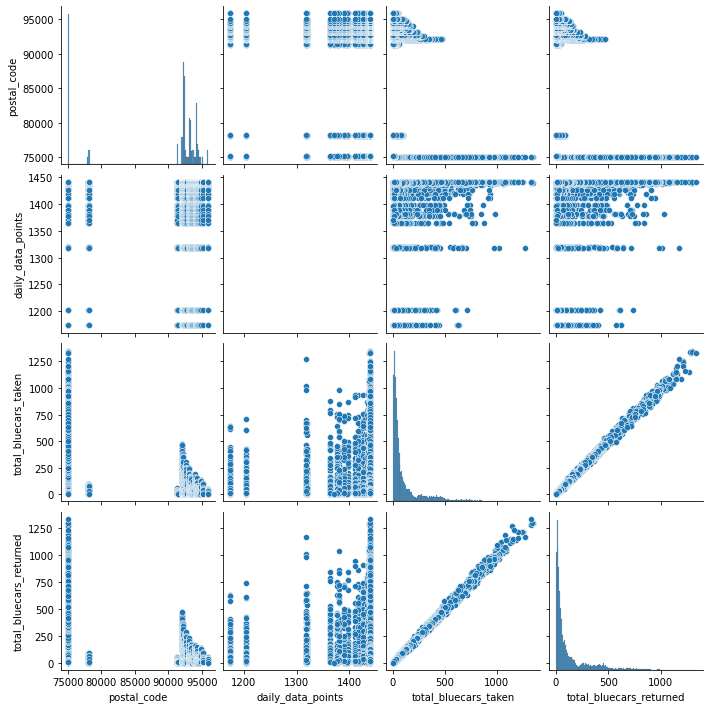

In [76]:
#Ploting the bivariate summaries and recording our observations
#
sns.pairplot(Autolib)
plt.show()

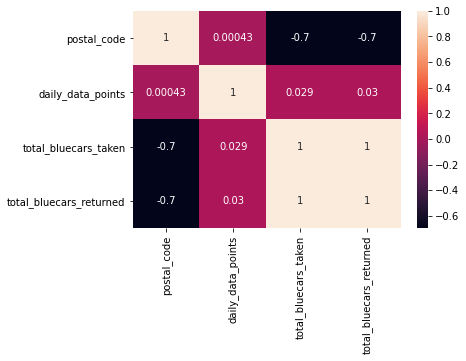

In [77]:
# Plotting the Pearson correlation coefficient among numeric variables
#
sns.heatmap(Autolib.corr(),annot=True)
plt.show()

The number of blue cars taken and returned have a perfect positive correlation.

The correlation with the postal code can be ignored here since the postal code is a qualitative attribute even though it has numeric data type.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(-2.5749999999999957, 0.5, 'Blue Cars Returned')

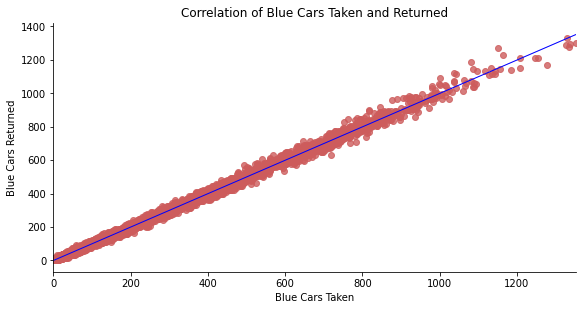

In [78]:
# scatter plot of blue cars taken and blue cars returned
#
sns.lmplot('total_bluecars_taken', "total_bluecars_returned", Autolib, scatter_kws={'marker':'o', 'color': 'indianred'}, 
           line_kws={'linewidth':1,'color':'blue'}, height = 4, aspect = 2)

plt.title("Correlation of Blue Cars Taken and Returned")
plt.xlabel('Blue Cars Taken')
plt.ylabel("Blue Cars Returned")

In [79]:

# Average number of blue cars taken each day of the week.
#
Autolib.groupby(['day_of_week'])['total_bluecars_taken'].mean()

day_of_week
friday       127.056803
monday       111.159646
saturday     156.124393
sunday       146.071240
thursday     116.052469
tuesday      110.850614
wednesday    115.453704
Name: total_bluecars_taken, dtype: float64

In [80]:
# Average number of blue cars returned each day of the week

Autolib.groupby(['day_of_week'])['total_bluecars_returned'].mean()

day_of_week
friday       125.948481
monday       111.545072
saturday     155.081606
sunday       148.986368
thursday     115.944004
tuesday      110.228523
wednesday    114.935185
Name: total_bluecars_returned, dtype: float64

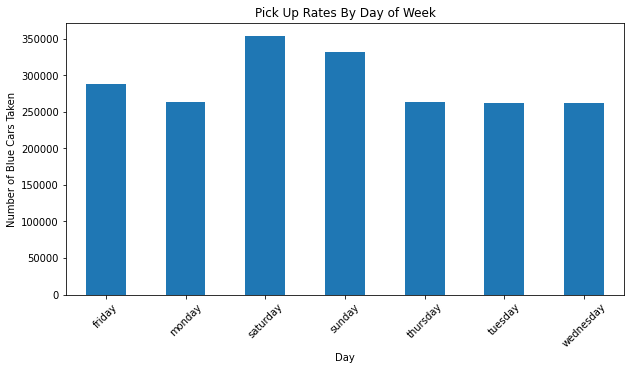

In [82]:
# Bar chart showing total number of blue cars picked up each day of the week.
#
Autolib.groupby('day_of_week')['total_bluecars_taken'].sum().plot(kind='bar', figsize=(10,5))
plt.xlabel("Day")
plt.xticks(rotation=45)
plt.ylabel("Number of Blue Cars Taken")
plt.title("Pick Up Rates By Day of Week")
plt.show()

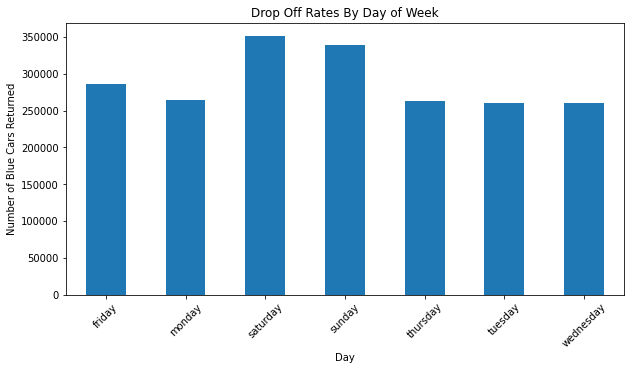

In [84]:
# Bar chart showing total number of blue cars returned by day of week
#
Autolib.groupby('day_of_week')['total_bluecars_returned'].sum().plot(kind='bar', figsize=(10,5))
plt.xlabel("Day")
plt.xticks(rotation=45)
plt.ylabel("Number of Blue Cars Returned")
plt.title("Drop Off Rates By Day of Week")
plt.show()

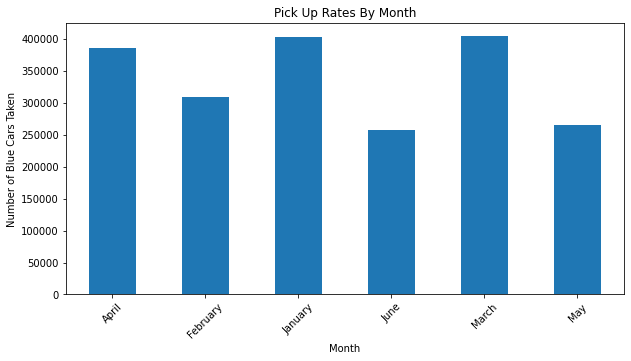

In [85]:
# Bar chart showing total number of blue cars picked up month.
#
Autolib.groupby('month')['total_bluecars_taken'].sum().plot(kind='bar', figsize=(10,5))
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.ylabel("Number of Blue Cars Taken")
plt.title("Pick Up Rates By Month")
plt.show()

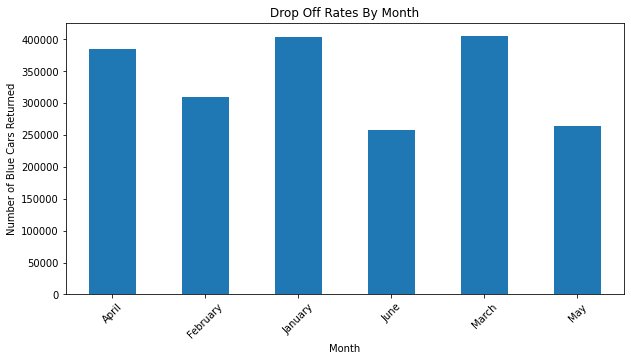

In [86]:
# Bar chart showing total number of blue cars returned month
#
Autolib.groupby('month')['total_bluecars_returned'].sum().plot(kind='bar', figsize=(10,5))
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.ylabel("Number of Blue Cars Returned")
plt.title("Drop Off Rates By Month")
plt.show()

# Formulating the Hypothesis

In France, postal codes are structured by cities (which are also referred to as departments). For example, all postal codes for Paris start with the number 75. To compress the dataset, we can cluster various Paris postal codes into one since they represent a similar geographical location like Paris city. We can do this for all other postal codes. 
As cited earlier, this analysis will emphasis on comparing the weekend blue car usage rates for Paris and Val-de-Marne.

Null Hypothesis: For both Paris and Val-de-Marne, the average number of blue cars picked up during weekends is the same.

Ho: μ1 = μ2 (where μ1 is the mean for Paris and μ2 is the mean for Val-de-Marne)

Alternate Hypothesis: The average number of blue cars picked up during the weekends is not the same for Paris and Val-de-Marne.
Ha: μ1 ≠ μ2


In [88]:
# Checking all unique postal codes in the dataset.
#
Autolib['postal_code'].unique()

array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009,
       75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018,
       75019, 75020, 75112, 75116, 78000, 78140, 78150, 91330, 91370,
       91400, 92000, 92100, 92110, 92120, 92130, 92140, 92150, 92160,
       92170, 92190, 92200, 92210, 92220, 92230, 92240, 92250, 92260,
       92270, 92290, 92300, 92310, 92320, 92330, 92340, 92350, 92360,
       92370, 92380, 92390, 92400, 92410, 92420, 92500, 92600, 92700,
       92800, 93100, 93110, 93130, 93150, 93170, 93200, 93230, 93260,
       93300, 93310, 93350, 93360, 93370, 93390, 93400, 93440, 93500,
       93600, 93700, 93800, 94000, 94100, 94110, 94120, 94130, 94140,
       94150, 94160, 94220, 94230, 94300, 94340, 94410, 94450, 94500,
       94700, 94800, 95100, 95870, 95880])

In [91]:
# Coding all postal codes with the city they represent.

# create a list of our condition
# Coding all postal codes with the city they represent

# create a list of our conditions
conditions = [
    (Autolib['postal_code'] >= 75000) & (Autolib['postal_code'] <= 75999),
    (Autolib['postal_code'] >= 78000) & (Autolib['postal_code'] <= 78999),
    (Autolib['postal_code'] >= 91000) & (Autolib['postal_code'] <= 91999),
    (Autolib['postal_code'] >= 92000) & (Autolib['postal_code'] <= 92999),
    (Autolib['postal_code'] >= 93000) & (Autolib['postal_code'] <= 93999),
    (Autolib['postal_code'] >= 94000) & (Autolib['postal_code'] <= 94999),
    (Autolib['postal_code'] >= 95000) & (Autolib['postal_code'] <= 95999),
    ]

# create a list of the values we want to assign for each condition
values = ['Paris', 'Antony', 'Hauts-de-Seine', 'Essonne', 'Seine-Saint_Denis', 'Val-de-Marne', 'Joseph']

# create a new column and use np.select to assign values to it using our lists as arguments
Autolib['city'] = np.select(conditions, values)

# display updated DataFrame.
Autolib.head()

,postal_code,date,daily_data_points,day_of_week,day_type,total_bluecars_taken,total_bluecars_returned,month,city
0,75001,2018-01-01,1440,monday,weekday,110,103,January,Paris
1,75001,2018-01-02,1438,tuesday,weekday,98,94,January,Paris
2,75001,2018-01-03,1439,wednesday,weekday,138,139,January,Paris
3,75001,2018-01-04,1320,thursday,weekday,104,104,January,Paris
4,75001,2018-01-05,1440,friday,weekday,114,117,January,Paris


In [92]:
# Confirming the new city attribute

Autolib['city'].unique()

array(['Paris', 'Antony', 'Hauts-de-Seine', 'Essonne',
       'Seine-Saint_Denis', 'Val-de-Marne', 'Joseph'], dtype=object)

# Sampling Approach

Since we compare samples from two different cities, i.e., in Paris versus Val-de-Marne, stratified random sampling is the best sampling method. In this case, the ‘city’ becomes the only strata suitable in our sampling method. Pick up and drop off stations are distinctive to postal codes/cities. A pick-up station can only be in one postal code or city. Therefore, a car pick up or drop off noted in a particular station belongs to a unique city. Using only one stratum ensures that every usage record has an equal chance of being selected during sampling. Each stratum has no overlapping sample, therefore no bias in the sampling method.

Also, the sample selected needs to imitate the structure of the target dataset. Our selected sample should imitate this distribution to ensure that it signifies the entire target population as possible. To perform the sampling, we would divide the target population into the two strata and order each record from 1 to N for both Paris and Seine-Saint-Denis stratum. We need the sample size of every stratum to be proportional to the target population size of that particular strata


In [97]:
# Creating a new dataframe with only Paris and Val-de-Marne.
# and only weekend records which is the target records.
#

Autolib_final = Autolib.loc[Autolib['city'].isin(['Paris','Val-de-Marne']) & Autolib['day_type'].isin(['weekend'])]
Autolib_final

,postal_code,date,daily_data_points,day_of_week,day_type,total_bluecars_taken,total_bluecars_returned,month,city
5,75001,2018-01-06,1437,saturday,weekend,187,185,January,Paris
6,75001,2018-01-07,1440,sunday,weekend,180,180,January,Paris
12,75001,2018-01-13,1440,saturday,weekend,224,223,January,Paris
13,75001,2018-01-14,1440,sunday,weekend,193,193,January,Paris
19,75001,2018-01-20,1439,saturday,weekend,217,217,January,Paris
...,...,...,...,...,...,...,...,...,...
15600,94800,2018-06-03,1440,sunday,weekend,124,111,June,Val-de-Marne
15606,94800,2018-06-09,1440,saturday,weekend,121,104,June,Val-de-Marne
15607,94800,2018-06-10,1440,sunday,weekend,116,125,June,Val-de-Marne
15613,94800,2018-06-16,1440,saturday,weekend,124,124,June,Val-de-Marne


In [98]:
Autolib_final.head(5)

,postal_code,date,daily_data_points,day_of_week,day_type,total_bluecars_taken,total_bluecars_returned,month,city
5,75001,2018-01-06,1437,saturday,weekend,187,185,January,Paris
6,75001,2018-01-07,1440,sunday,weekend,180,180,January,Paris
12,75001,2018-01-13,1440,saturday,weekend,224,223,January,Paris
13,75001,2018-01-14,1440,sunday,weekend,193,193,January,Paris
19,75001,2018-01-20,1439,saturday,weekend,217,217,January,Paris


In [99]:
Autolib_final.tail(5)

,postal_code,date,daily_data_points,day_of_week,day_type,total_bluecars_taken,total_bluecars_returned,month,city
15600,94800,2018-06-03,1440,sunday,weekend,124,111,June,Val-de-Marne
15606,94800,2018-06-09,1440,saturday,weekend,121,104,June,Val-de-Marne
15607,94800,2018-06-10,1440,sunday,weekend,116,125,June,Val-de-Marne
15613,94800,2018-06-16,1440,saturday,weekend,124,124,June,Val-de-Marne
15614,94800,2018-06-17,1440,sunday,weekend,125,123,June,Val-de-Marne


In [100]:
# Checking the distribution of usage/records by city
#
Autolib_final['city'].value_counts()

Paris           968
Val-de-Marne    748
Name: city, dtype: int64

In [101]:
# lets check by Stratified sample
# We will choose a sample size of 15% of all target records

sample = Autolib_final.groupby('city', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.15))

# proportion of the stratified sample
print(sample['city'].value_counts())

# Check the stratified output
print(sample)

Paris           145
Val-de-Marne    112
Name: city, dtype: int64
       postal_code       date  ...     month          city
2693         75018 2018-02-11  ...  February         Paris
1891         75013 2018-01-20  ...   January         Paris
3390         75116 2018-04-28  ...     April         Paris
1824         75012 2018-04-22  ...     April         Paris
1525         75010 2018-05-05  ...       May         Paris
...            ...        ...  ...       ...           ...
15182        94500 2018-02-03  ...  February  Val-de-Marne
14189        94160 2018-05-26  ...       May  Val-de-Marne
13847        94140 2018-04-15  ...     April  Val-de-Marne
14976        94410 2018-06-02  ...      June  Val-de-Marne
14443        94230 2018-03-18  ...     March  Val-de-Marne

[257 rows x 9 columns]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


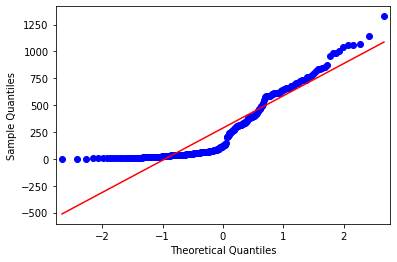

In [102]:
# Performing normality test on the sample selected

from statsmodels.graphics.gofplots import qqplot

# q-q plot

qqplot(sample['total_bluecars_taken'], line='s')
plt.show()

The sample did not have a normal distribution could be because of the outliers in the dataset.

For this we will not remove the outliers they might be of significance to our study.

we can still proceed with hyothesis testing since the sample size is greater than 30.

# Hypothesis Testing

We will use a two sample z-test and p-value to either accept or reject our null hypothesis to perform hypothesis testing.
Below are the reasons why we choose to use the z-test as the right test statistic:

•	Data points are independent of each other.

•	The sample size is greater than 30.

•	The sample data has been randomly selected from a population, so there is an equal chance of being selected for each item.


In [106]:
# Lets first define the two samples separately

paris = sample[(sample['city'] == 'Paris')]
Val_de_Marne = sample[(sample['city'] == 'Val-de-Marne')]

print(paris)
print(Val_de_Marne)

      postal_code       date  ...     month   city
2693        75018 2018-02-11  ...  February  Paris
1891        75013 2018-01-20  ...   January  Paris
3390        75116 2018-04-28  ...     April  Paris
1824        75012 2018-04-22  ...     April  Paris
1525        75010 2018-05-05  ...       May  Paris
...           ...        ...  ...       ...    ...
2649        75017 2018-06-17  ...      June  Paris
1980        75013 2018-04-22  ...     April  Paris
1088        75007 2018-06-16  ...      June  Paris
926         75006 2018-06-10  ...      June  Paris
308         75002 2018-06-16  ...      June  Paris

[145 rows x 9 columns]
       postal_code       date  ...     month          city
13150        94100 2018-01-28  ...   January  Val-de-Marne
13319        94110 2018-02-11  ...  February  Val-de-Marne
13752        94140 2018-01-07  ...   January  Val-de-Marne
13068        94000 2018-04-15  ...     April  Val-de-Marne
15197        94500 2018-02-18  ...  February  Val-de-Marne
...       

# Significance level 

The significance level is defined as the probability of rejecting the null hypothesis when it is true. For this analysis, the significance level chosen is 0.05 or 5%.

If the calculated p-value from the test statistic is less than 0.05, we reject the null hypothesis. If the value is greater than or equal to 0.05, then we accept the null hypothesis.


# Critical Value


As α = 0.05, and the test statistic is a one-tailed test, the critical value of z is 1.645, as per the z critical value table.


## Z-Score and P-value

In [107]:
# Then, we calculate both the z-score and p value

from scipy import stats
from statsmodels.stats import weightstats as stests

ztest ,pval1 = stests.ztest(x1=paris['total_bluecars_taken'], x2=hauts['total_bluecars_taken'], value=0,alternative='two-sided')
print(float(pval1))
if pval1<0.05:
    print("Reject Null Hypothesis")
else:
    print("Accept Null Hypothesis")

3.790179011261841e-52
Reject Null Hypothesis


From the results the P-value from the two sample Z-test is less than 0.05 therefore we reject the null hypothesis

In [108]:
print(ztest)

15.195455826186167


The Z-test is 15.195 much higher than Z-critical value which further proves that we should reject our null hyothesis.

## Power of the test

In [109]:
# Checking the power of the two sample z test

from statsmodels.stats.power import zt_ind_solve_power

alpha=0.05
ratio=(158/97)
effect_size= 0.3

statistical_power = zt_ind_solve_power(effect_size=effect_size, nobs1=97, alpha=alpha, power=None, ratio=ratio, alternative='two-sided')
print("The statistical power is: {0}".format(statistical_power))

The statistical power is: 0.6427518155138209


The power of the test results is 64%. Preferably, this should be closer to 90% for a more significant statistical test.

Some of the factors that could have affected the statistical power of the test include:

•	The population did not follow a normal distribution.

•	The sample sizes for the two strata were not the same.


# Hypothesis Test results discussion

The p-value of the two sample z test was calculated and found that the p values are 3.790179011261841e-52, lower than 0.05. Therefore, we reject the null hypothesis. This means that the average number of blue cars picked up on weekends is not the same for Paris and Val-de-Marne.

 In this case, we accept the alternate hypothesis.
The calculated z statistic is 15.195455826186167 against the expected critical value of 1.645. It means that the data points are 15.2 standard deviations away from the mean. This is further evidence that we need to reject the null hypothesis.


# Summary and Conclusions


The null and alternate hypothesis was successfully defined. Performed the sampling technique and carried out hypothesis testing, which resulted in the rejection of the null hypothesis. 
From the results, concluded that the average number of blue cars picked up in  Val-de-Marne is not the same in Paris.
